*Import Libraries*

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

In [3]:
CLIENT_ID = 'VQC3V3XLMDUHELR2LMJJE2H5H1SMZFCREJWPLAP1MSLPHXL4' # Foursquare ID
CLIENT_SECRET = '2J3KAHT5QA0FXDPXFQLYD5UHX0KM2HDFEHTUXRGYKHFYBXUJ' # Foursquare Secret
VERSION = '20190929'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VQC3V3XLMDUHELR2LMJJE2H5H1SMZFCREJWPLAP1MSLPHXL4
CLIENT_SECRET:2J3KAHT5QA0FXDPXFQLYD5UHX0KM2HDFEHTUXRGYKHFYBXUJ


*Find out Din Tai Fung branches in Seattle*

In [5]:
LIMIT=500

radius=100000

search_query='Din Tai Fung Dumpling Restaurant'

city='Seattle'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,city,VERSION, search_query, radius, LIMIT)
results = requests.get(url).json() 

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

In [9]:
dataframe=dataframe.dropna(subset=['location.address'])  #Drop NaN values/ non existent Din Tai Fung

In [10]:
dataframe.reset_index(drop=True,inplace=True) #reset the index

In [11]:
dataframe

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress
0,582f57c70162176af65dcf1a,Din Tai Fung Dumpling House,"[{'id': '4bf58dd8d48988d108941735', 'name': 'D...",v-1571786341,False,600 Pine St Ste 403,6th Ave,47.612671,-122.335073,"[{'label': 'display', 'lat': 47.61267083634607...",98101,US,Seattle Central Business District,Seattle,WA,United States,"[600 Pine St Ste 403 (6th Ave), Seattle, WA 98..."
1,4ca90ce0b7106dcba8ee78a5,Din Tai Fung Dumpling House,"[{'id': '4bf58dd8d48988d108941735', 'name': 'D...",v-1571786341,False,700 Bellevue Way NE,700 Bellevue Way NE #280,47.617241,-122.200793,"[{'label': 'display', 'lat': 47.617241079519, ...",98004,US,NaN,Bellevue,WA,United States,[700 Bellevue Way NE (700 Bellevue Way NE #280...
2,52bf895b498e1205b1603e73,Din Tai Fung 鼎泰豐,"[{'id': '4bf58dd8d48988d108941735', 'name': 'D...",v-1571786341,False,2621 NE 46th St,"University Village, 2nd Floor",47.661567,-122.299725,"[{'label': 'display', 'lat': 47.661567, 'lng':...",98105,US,University District,Seattle,WA,United States,"[2621 NE 46th St (University Village, 2nd Floo..."
3,58fbc59fc21cb16c1713bd76,Din Tai Fung Dumpling House,"[{'id': '4bf58dd8d48988d108941735', 'name': 'D...",v-1571786341,False,181 Southcenter Mall,NaN,47.458467,-122.260786,"[{'label': 'display', 'lat': 47.45846747293659...",98188,US,NaN,Tukwila,WA,United States,"[181 Southcenter Mall, Tukwila, WA 98188, Unit..."
4,5abd8b02bb2a476df8a9883c,Din Tai Fung,"[{'id': '4bf58dd8d48988d108941735', 'name': 'D...",v-1571786341,False,T-Mobile Park,NaN,47.590755,-122.333009,"[{'label': 'display', 'lat': 47.590755, 'lng':...",98134,US,NaN,Seattle,WA,United States,"[T-Mobile Park, Seattle, WA 98134, United States]"


*Din Tai Fung's average score*

In [19]:
ratings = np.zeros((0,))
for i in range(0,4):
 venue_id = dataframe.iloc[i,0] # ID of Din Tai Fung branches
 url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
 result = requests.get(url).json()
 ratings=np.append(ratings,[result['response']['venue']['rating']],axis=0)
ratings.mean()

8.825

*Din Tai Fung's competitors*

In [12]:
appended_data = pd.DataFrame()
for i in range(0,4):
 latitude = dataframe.loc[i, 'location.lat'] # Din Tai Fung's latitude value
 longitude = dataframe.loc[i, 'location.lng'] # Din Tai Fung's longitude value
 search_query='Dumpling'#Search for nearby dumpling restaurants around Din Tai Fung
 LIMIT=100
 radius=30000 #The maximum distance is 30km
 url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
 results = requests.get(url).json()
 # assign relevant part of JSON to venues
 venues = results['response']['venues']
 # tranform venues into a dataframe
 dtf0= json_normalize(venues)
 dtf0=dtf0[['id','name']]
 appended_data=appended_data.append(dtf0,ignore_index=True)

In [13]:
appended_data

,id,name
0,582f57c70162176af65dcf1a,Din Tai Fung Dumpling House
1,5d239320d1c2670023b26638,Dough Zone Dumpling House
2,564ea6e2498e8183b43620f1,Pel'Meni Dumpling Tzar
3,4ca90ce0b7106dcba8ee78a5,Din Tai Fung Dumpling House
4,59caa279e96d0c7515ffb740,Dough Zone Dumpling House
...,...,...
117,4f3214e919836c91c7b3ebe3,House of Dumplings
118,5af5097f4f0e5800395f1748,Little Tings Dumplings And Clay Pot
119,59d6f673f0b4900f69e91d0e,J'Dumpling House
120,54de771d498e005bd8371cff,Ming's Dumpling House


In [14]:
appended_data.drop_duplicates(inplace=True) # Since Din Tai Fung branches are close to each other and the results might overlap , we only keep the unique restaurants. 
appended_data = appended_data.reset_index(drop=True)

In [15]:
appended_data.shape # Find out the number of the remaining restaurants

(32, 2)

*Preview the competitors*

In [17]:
competitors=appended_data['name'].value_counts() # Count the branches of dumpling restaurants

In [18]:
competitors

Dough Zone Dumpling House              5
Din Tai Fung Dumpling House            3
Dumplings Of Fury                      2
Pel'Meni Dumpling Tzar                 2
Din Tai Fung 鼎泰豐                       1
Dumpling & Noodle                      1
Little Tings Dumplings And Clay Pot    1
Northern Dumpling House                1
Dumpling House                         1
Dough Zone Dumpling House #4           1
Li's Dumplings                         1
Little Ting's Dumplings                1
House of Dumplings                     1
J'Dumpling House                       1
Yang's Dumpling House                  1
Ming's Dumpling House                  1
Mommy's Dumpling House                 1
Ping's Dumpling House & Market         1
Chongqing Dumpling                     1
Dumpling Generation                    1
Alaskan Dumplings                      1
Singapore Dumpling Pacific             1
The Dump Truck Dumplings               1
China Dumpling & Noodle House          1
Name: name, dtyp

*Get the ratings and the number of branches of all dumpling restaurants near Din Tai Fung(Din Tai Fung included)*

In [19]:
ratings1 = []
for i in range(0,32):
 venue_id = appended_data.iloc[i,0] # ID of Harry's Italian Pizza Bar
 url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
 result = requests.get(url).json()
 #dtf0['rating'][i]=result['response']['venue']['rating']
 #dtf0['tier'][i]=result['response']['venue']['price']['tier']
 #ratings=np.append(ratings,[result['response']['venue']['rating']],axis=0)
#ratings
 try:
    ratings1.append(result['response']['venue']['rating'])
 except:
    ratings1.append('NA')
appended_data["ratings"] = ratings1  

In [20]:
appended_data

,id,name,ratings
0,582f57c70162176af65dcf1a,Din Tai Fung Dumpling House,8.9
1,5d239320d1c2670023b26638,Dough Zone Dumpling House,8.1
2,564ea6e2498e8183b43620f1,Pel'Meni Dumpling Tzar,7.4
3,4ca90ce0b7106dcba8ee78a5,Din Tai Fung Dumpling House,9
4,59caa279e96d0c7515ffb740,Dough Zone Dumpling House,8.6
5,4f20aed7e4b0e479d351d3d1,Ping's Dumpling House & Market,5.4
6,4d4cc177f06a8eec55ed7283,Pel'Meni Dumpling Tzar,7.7
7,58fbc59fc21cb16c1713bd76,Din Tai Fung Dumpling House,8.3
8,5cfd5d80c03635002c752cad,Dumpling & Noodle,NA
9,54c8558d498e7159ced5af29,Dough Zone Dumpling House,8.6


In [23]:
appended_data=appended_data[appended_data.ratings!="NA"] # Drop NA ratings because we assume that the restaurants are not popular enough to be considered as Din Tai Fung's direct competitors

In [27]:
appended_data=appended_data[~appended_data.name.str.contains("Din Tai Fung")] # Drop Din Tai Fung ratings

In [28]:
appended_data.name=appended_data.name.replace('#4','').astype(str)
appended_data.name=appended_data.name.astype(str) # Preprocess unregular data strings

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
appended_data['counts'] = appended_data.groupby(['name'])['ratings'].transform('count') # Add counts of branches in the list

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
appended_data.name=appended_data.name.replace('#4','').astype(str)

In [33]:
appended_data.replace('#4', '')

,id,name,ratings,counts
1,5d239320d1c2670023b26638,Dough Zone Dumpling House,8.1,5
2,564ea6e2498e8183b43620f1,Pel'Meni Dumpling Tzar,7.4,2
4,59caa279e96d0c7515ffb740,Dough Zone Dumpling House,8.6,5
5,4f20aed7e4b0e479d351d3d1,Ping's Dumpling House & Market,5.4,1
6,4d4cc177f06a8eec55ed7283,Pel'Meni Dumpling Tzar,7.7,2
9,54c8558d498e7159ced5af29,Dough Zone Dumpling House,8.6,5
12,56884717498e546e3a23ce29,Dough Zone Dumpling House,8.4,5
13,5388cecf498ef00115e0899d,Dough Zone Dumpling House,7.9,5
16,5792c2b0498ed31408dc868f,Dumplings Of Fury,7.8,1
17,53332bcc498e7ccf9018ea71,Dumpling Generation,7.1,1


In [40]:
appended_data["ratings"] = appended_data["ratings"].apply(pd.to_numeric) # Convert ratings to numerical values so we can calculate means of all the branches 
df1=appended_data.groupby(['name'])['ratings'].mean().to_frame() # calculate means and make it a colomn of a new data frame

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df2=appended_data.name.value_counts().to_frame() # make a column of countings in a new data frame of all these competitors

In [42]:
df3=df2.join(df1) # Combine df1 and df2 together 

In [43]:
df3.loc['Din Tai Fung'] = [4, 8.83] # Add Din Tai Fung data

In [44]:
df3

,name,ratings
Dough Zone Dumpling House,5.0,8.32
Pel'Meni Dumpling Tzar,2.0,7.55
Yang's Dumpling House,1.0,6.30
Dumpling Generation,1.0,7.10
Dumplings Of Fury,1.0,7.80
Little Ting's Dumplings,1.0,8.10
Dough Zone Dumpling House #4,1.0,8.80
Ping's Dumpling House & Market,1.0,5.40
China Dumpling & Noodle House,1.0,6.30
Din Tai Fung,4.0,8.83


In [45]:
df3.loc['Dough Zone Dumpling House'] = [6, (8.32*5+8.8)/6] # Recalculate the Dough Zone Dumpling House's average rating by including "Dough Zone Dumpling House #4"

In [46]:
df3.drop(index='Dough Zone Dumpling House #4',inplace=True) # Drop "Dough Zone Dumpling House #4

In [47]:
df3

,name,ratings
Dough Zone Dumpling House,6.0,8.40
Pel'Meni Dumpling Tzar,2.0,7.55
Yang's Dumpling House,1.0,6.30
Dumpling Generation,1.0,7.10
Dumplings Of Fury,1.0,7.80
Little Ting's Dumplings,1.0,8.10
Ping's Dumpling House & Market,1.0,5.40
China Dumpling & Noodle House,1.0,6.30
Din Tai Fung,4.0,8.83


*Add pricing level to the competitor table(df3)*

In [48]:
price=[11.25,0,8.99,0,9,11.59,8.99,7.95,10.5]
df3=df3.assign(price=price)

In [49]:
df3

,name,ratings,price
Dough Zone Dumpling House,6.0,8.40,11.25
Pel'Meni Dumpling Tzar,2.0,7.55,0.00
Yang's Dumpling House,1.0,6.30,8.99
Dumpling Generation,1.0,7.10,0.00
Dumplings Of Fury,1.0,7.80,9.00
Little Ting's Dumplings,1.0,8.10,11.59
Ping's Dumpling House & Market,1.0,5.40,8.99
China Dumpling & Noodle House,1.0,6.30,7.95
Din Tai Fung,4.0,8.83,10.50


*Early visualization of the dumpling restaurants similarity without the consideration of the number of branches*

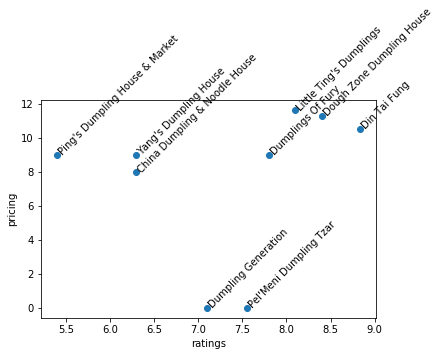

In [82]:
import matplotlib.pyplot as plt
x=df3.ratings.values
y=df3.price.values
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel('ratings')
ax.set_ylabel('pricing')
n=df3.index.values
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]),rotation=45)

*Perform K-means Clustering with all the data*

In [88]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:9] 

array([0, 1, 2, 1, 2, 2, 2, 2, 0], dtype=int32)

In [89]:
# add clustering labels
df3['Cluster Labels']= kmeans.labels_

df3

,name,ratings,price,Cluster Labels
Dough Zone Dumpling House,6.0,8.40,11.25,0
Pel'Meni Dumpling Tzar,2.0,7.55,0.00,1
Yang's Dumpling House,1.0,6.30,8.99,2
Dumpling Generation,1.0,7.10,0.00,1
Dumplings Of Fury,1.0,7.90,9.00,2
Little Ting's Dumplings,1.0,8.00,11.59,2
Ping's Dumpling House & Market,1.0,5.40,8.99,2
China Dumpling & Noodle House,1.0,6.30,7.95,2
Din Tai Fung,4.0,8.83,10.50,0
